# Note: You need to Install the TensorFlow Library For Performing the below codes

# Import Libraries 


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

In [4]:
path = '/Users/priyanshu/Downloads/Rice_Image_Dataset'

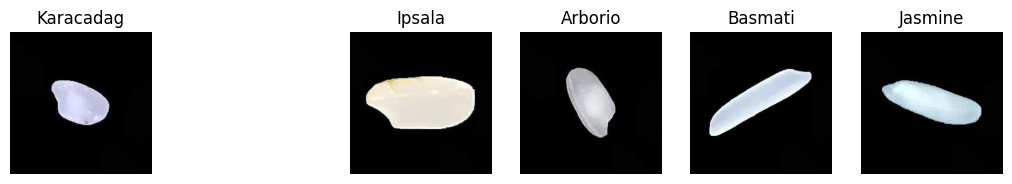

In [5]:
if os.path.isdir(path):
    folders = os.listdir(path)

    plt.figure(figsize=(15, 10))
    for i, folder in enumerate(folders, start=1):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            images = os.listdir(folder_path)
            if images:
                image_path = os.path.join(folder_path, images[0])
                # show image
                img = mpimg.imread(image_path)
                plt.subplot(1, 7, i)
                plt.imshow(img)
                plt.title(folder)
                plt.axis('off')

    plt.show()
else:
    print(f' "{path}" ')

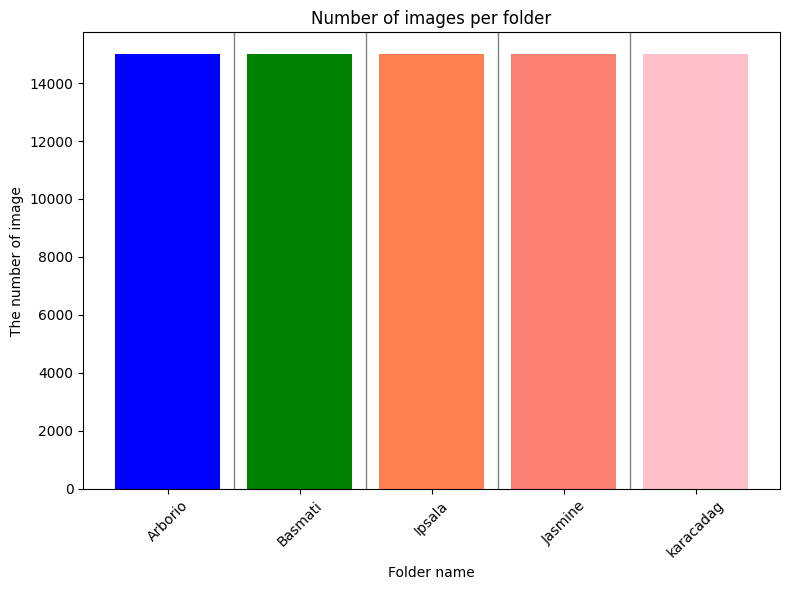

In [6]:
images_per_folder = []

folder_names = ["Arborio", "Basmati", "Ipsala", "Jasmine", "karacadag"]

colors = ['blue', 'green', 'coral', 'salmon', 'pink']

for folder in folders:
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        images_per_folder.append(num_images)

plt.figure(figsize=(8, 6))

for i in range(len(folder_names)):
    plt.bar(folder_names[i], images_per_folder[i], color=colors[i])

for i in range(len(folder_names) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='-', linewidth=1)

plt.xlabel('Folder name')
plt.ylabel('The number of image')
plt.title('Number of images per folder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

all_images = []

for folder in folders:
    folder_path = os.path.join(path, folder)
    images = os.listdir(folder_path)
    all_images.extend([(folder, img) for img in images])


train_images, test_images = train_test_split(all_images, test_size=0.3, random_state=42)
test_images, val_images = train_test_split(test_images, test_size=0.5, random_state=42)


def save_images(images, folder_name):
    save_dir = os.path.join("/Users/priyanshu/Downloads/Rice_Images", folder_name)
    os.makedirs(save_dir, exist_ok=True)
    for folder, img_name in images:
        src_path = os.path.join(path, folder, img_name)
        dst_path = os.path.join(save_dir, folder, img_name)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)


save_images(train_images, "train")

save_images(test_images, "test")

save_images(val_images, "validation")

In [8]:
print(train_images[0])
print(test_images[0])
print(val_images[0])

('Basmati', 'basmati (1636).jpg')
('Ipsala', 'Ipsala (2402).jpg')
('Jasmine', 'Jasmine (13231).jpg')


In [9]:
BATCH_SIZE = 14
IMAGE_SIZE = (120,120)

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/Users/priyanshu/Downloads/Rice_Images/train'
validation_dir = '/Users/priyanshu/Downloads/Rice_Images/validation'
test_dir = '/Users/priyanshu/Downloads/Rice_Images/test'

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


# Model 1

In [10]:
CNN = tf.keras.models.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation="relu", input_shape=[120,120,3]))
CNN.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=512 , activation="relu"))
CNN.add(tf.keras.layers.Dense(units=5 , activation="softmax"))
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 111392)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    57,033,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,036,677 (217.58 MB)

 Trainable params: 57,036,677 (217.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
CNN.compile(optimizer="adam" , loss="categorical_crossentropy", metrics=['accuracy'])
history = CNN.fit(x=train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 963s 256ms/step - accuracy: 0.9332 - loss: 0.2271 - val_accuracy: 0.9693 - val_loss: 0.0917
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 991s 264ms/step - accuracy: 0.9772 - loss: 0.0679 - val_accuracy: 0.9734 - val_loss: 0.0845
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1012s 270ms/step - accuracy: 0.9853 - loss: 0.0425 - val_accuracy: 0.9652 - val_loss: 0.1108
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1088s 290ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9711 - val_loss: 0.1197
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1710s 456ms/step - accuracy: 0.9957 - loss: 0.0119 - val_accuracy: 0.9744 - val_loss: 0.1215


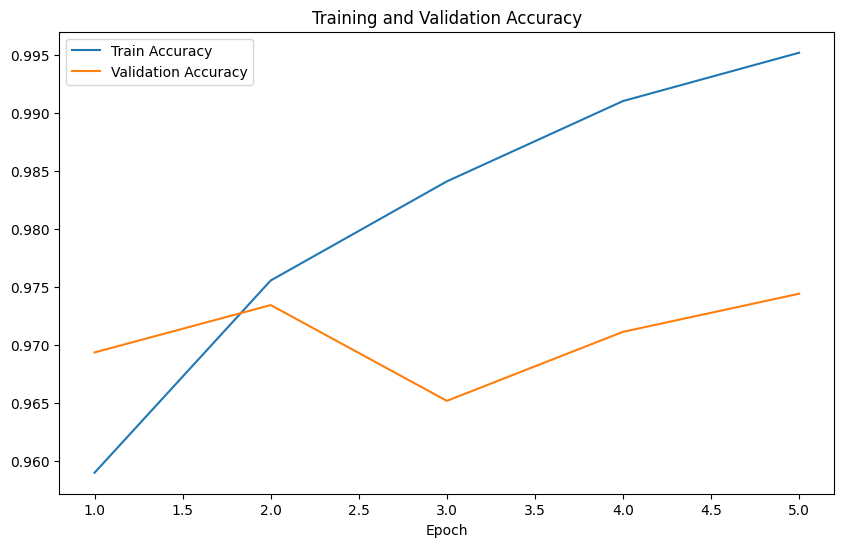

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


fig, ax = plt.subplots(figsize=(10,6))

ax.plot(range(1, 6), accuracy, label='Train Accuracy')
ax.plot(range(1, 6), val_accuracy, label='Validation Accuracy')

ax.set_xlabel('Epoch')

ax.set_title('Training and Validation Accuracy')

ax.legend()
plt.show()

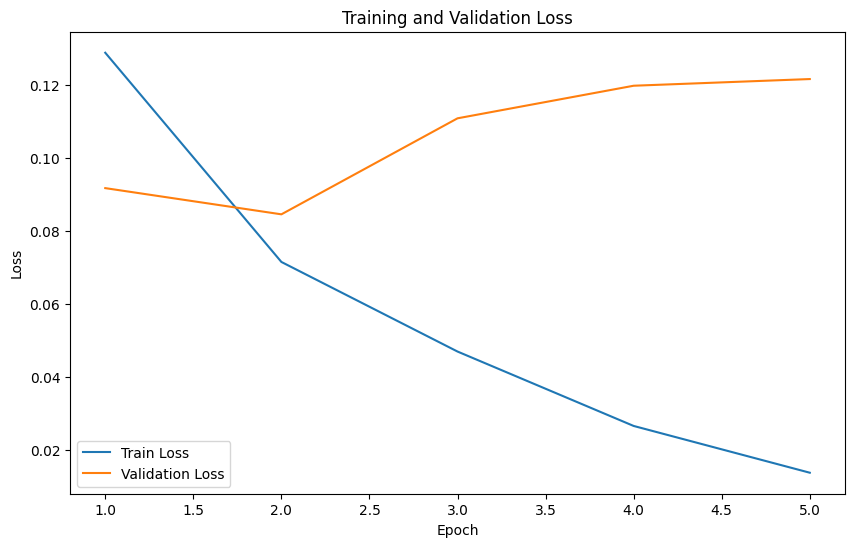

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, 6), loss, label='Train Loss')
ax.plot(range(1, 6), val_loss, label='Validation Loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss')

ax.legend()
plt.show()

# Model 2


In [26]:
CNN2 = tf.keras.models.Sequential()
CNN2.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation="relu", input_shape=[120,120,3]))
CNN2.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))
CNN2.add(tf.keras.layers.Flatten())
CNN2.add(tf.keras.layers.Dense(units=300 , activation="relu"))
CNN2.add(tf.keras.layers.Dropout(0.2))
CNN2.add(tf.keras.layers.Dense(units=5 , activation="softmax"))
CNN2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 111392)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │    33,417,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         1,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,420,301 (127.49 MB)

 Trainable params: 33,420,301 (127.49 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
CNN2.compile(optimizer="adam" , loss="categorical_crossentropy", metrics=['accuracy'])
history = CNN2.fit(x=train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 519s 138ms/step - accuracy: 0.9264 - loss: 0.2466 - val_accuracy: 0.9675 - val_loss: 0.0935
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 734s 196ms/step - accuracy: 0.9741 - loss: 0.0768 - val_accuracy: 0.9686 - val_loss: 0.0961
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 499s 133ms/step - accuracy: 0.9835 - loss: 0.0502 - val_accuracy: 0.9714 - val_loss: 0.0898
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 514s 137ms/step - accuracy: 0.9893 - loss: 0.0311 - val_accuracy: 0.9745 - val_loss: 0.0975
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 543s 145ms/step - accuracy: 0.9929 - loss: 0.0199 - val_accuracy: 0.9748 - val_loss: 0.1138


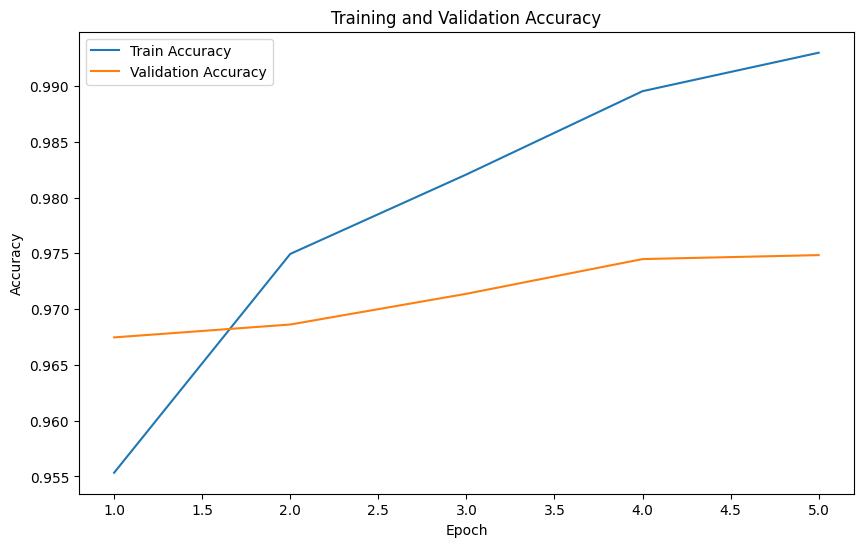

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, 6), accuracy, label='Train Accuracy')
ax.plot(range(1, 6), val_accuracy, label='Validation Accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy')

ax.legend()
plt.show()

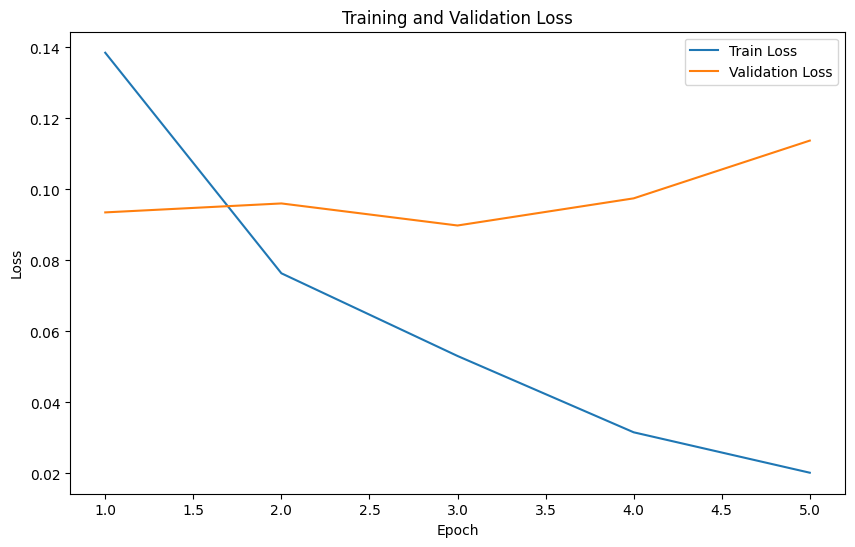

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, 6), loss, label='Train Loss')
ax.plot(range(1, 6), val_loss, label='Validation Loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss')

ax.legend()
plt.show()

# Confusion Matrix for model 1

804/804 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step


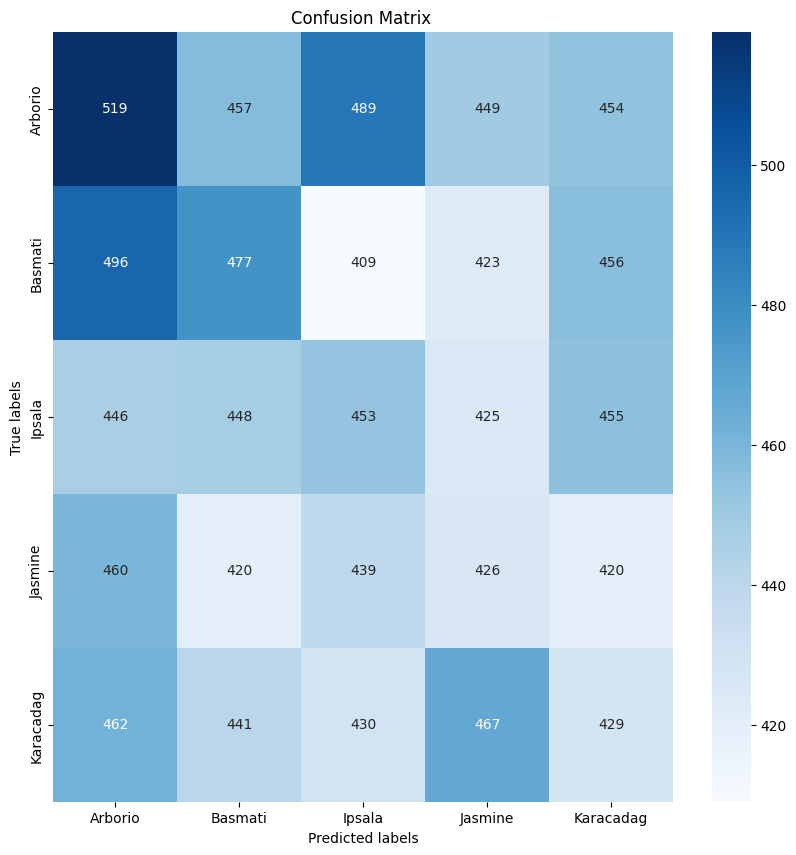

In [42]:
predictions = CNN.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

confusion_mtx = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(confusion_mtx, annot=confusion_mtx, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix ')
plt.show()

# Confusion Matrix for model 2

804/804 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step


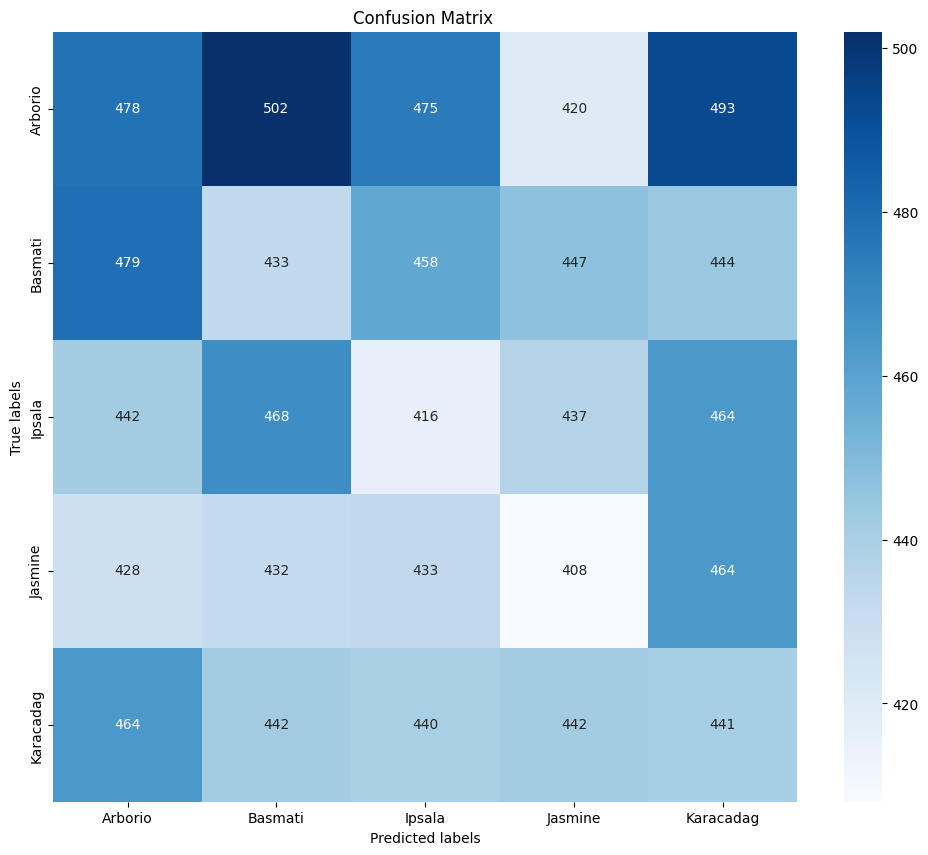

In [41]:
predictions = CNN2.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

confusion_mtx = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(12, 10))
ax = sns.heatmap(confusion_mtx, annot=confusion_mtx, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix ')
plt.show()

# Testing the Model accuracy 

In [32]:
test_dir = '/Users/priyanshu/Downloads/Rice_Images/test'

class_labels = os.listdir(test_dir)

print("The names of the classes:", class_labels)

for label in class_labels:
    class_path = os.path.join(test_dir, label)
    file_count = len(os.listdir(class_path))
    print(f"Number of class files {label}: {file_count}")

The names of the classes: ['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']
Number of class files Karacadag: 2243
Number of class files Ipsala: 2248
Number of class files Arborio: 2282
Number of class files Basmati: 2217
Number of class files Jasmine: 2260


<Figure size 640x480 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


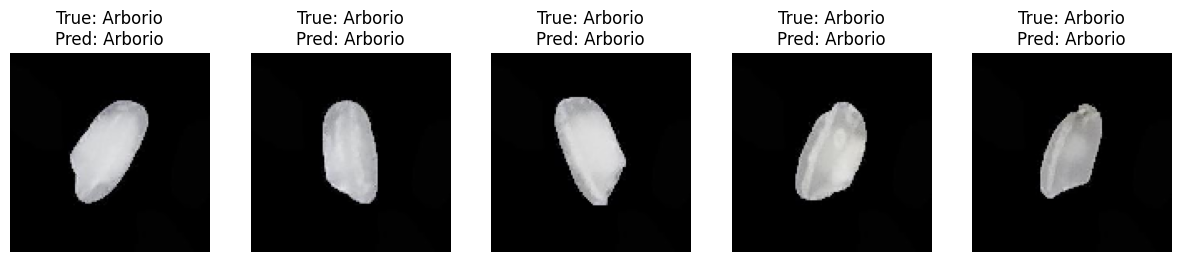

In [39]:
def show_predictions(generator, model, class_labels, images_per_class=1):
    plt.figure(figsize=(15, 15))
    image_count = 0
    
    
    x_batch, y_batch = next(generator)

    for class_idx, class_label in enumerate(class_labels):
        count = 0
        for i in range(len(x_batch)):
            if np.argmax(y_batch[i]) == class_idx and count < images_per_class:
                img = x_batch[i]
                true_class = np.argmax(y_batch[i])
                prediction = model.predict(np.expand_dims(img, axis=0))
                predicted_class = np.argmax(prediction, axis=1)[0]
                
                plt.subplot(len(class_labels), images_per_class, image_count + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f'True: {class_labels[true_class]}\nPred: {class_labels[predicted_class]}')
                image_count += 1
                count += 1

plt.tight_layout()
plt.show()


class_labels = list(test_generator.class_indices.keys())


show_predictions(test_generator, CNN2, class_labels, images_per_class=5)